In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Baseball_Case_Study.csv')

In [5]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df.shape

(30, 17)

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.shape[0]

30

In [10]:
df.shape[1]

17

In [11]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [12]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [23]:
df.sample(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95


In [24]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# Missing Values Treatment

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [15]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

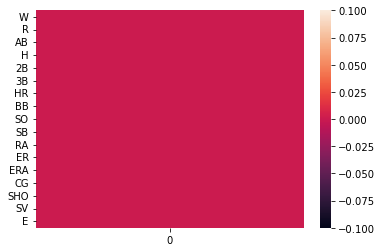

In [39]:
sns.heatmap(df.isnull().sum().to_frame())

# There are no null values in data

# Exploratory Data Analysis (EDA)

In [31]:
import seaborn as sns

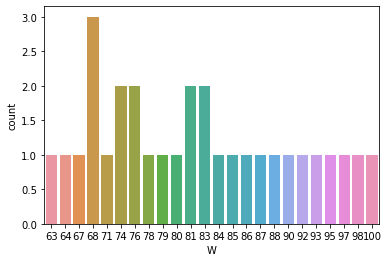

In [34]:
ax=sns.countplot(x='W',data=df)

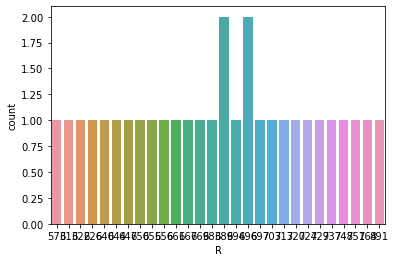

In [35]:
ax=sns.countplot(x='R',data=df)


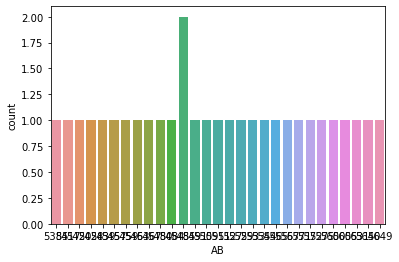

In [36]:
ax=sns.countplot(x='AB',data=df)


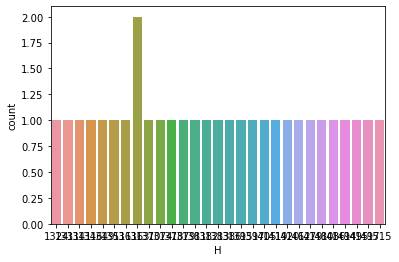

In [37]:
ax=sns.countplot(x='H',data=df)

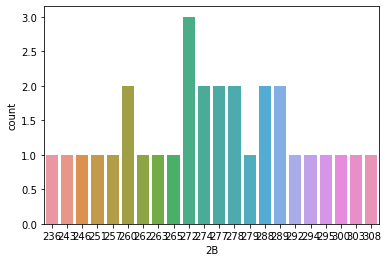

In [38]:
ax=sns.countplot(x='2B',data=df)

There are no null values in data

# Describe the dataset:

In [22]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [25]:
import matplotlib.pyplot as plt

<AxesSubplot:>

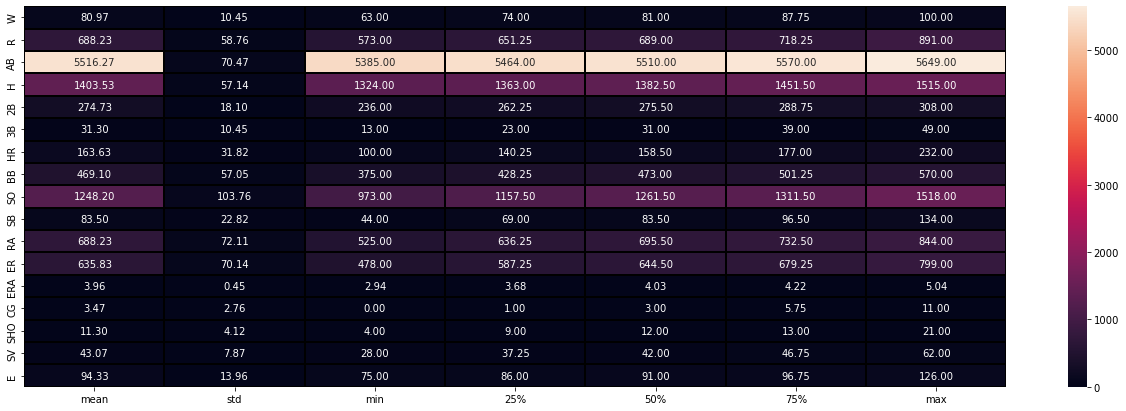

In [29]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidth=0.1,linecolor='Black',fmt='0.2f')

# Correlation of the columns with target columns:

In [41]:
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

<AxesSubplot:>

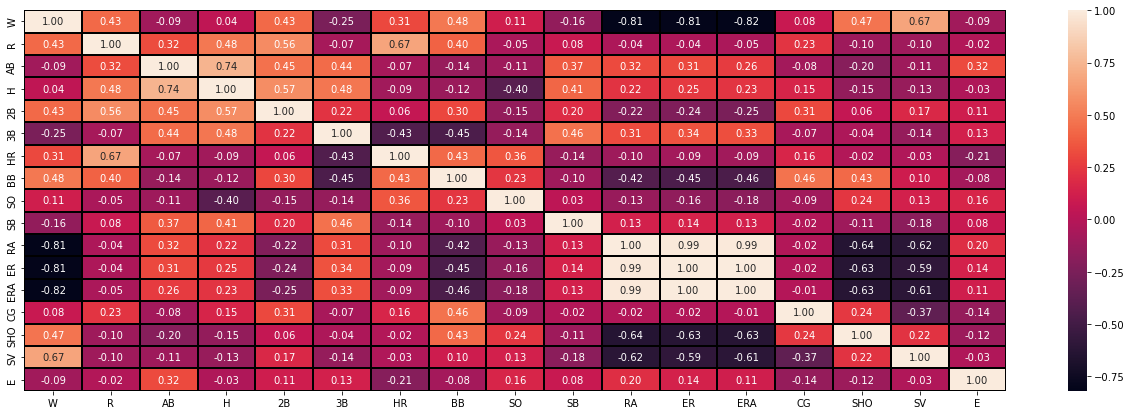

In [42]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking the columns which are positively and negative correlated with the target column

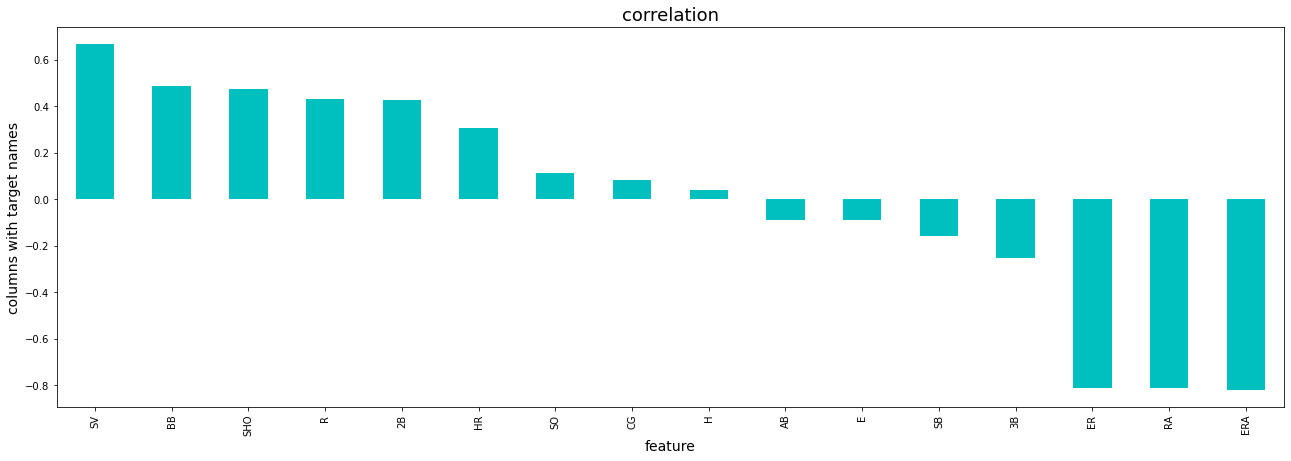

In [44]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [45]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [46]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

# Checking the outliers:

<AxesSubplot:>

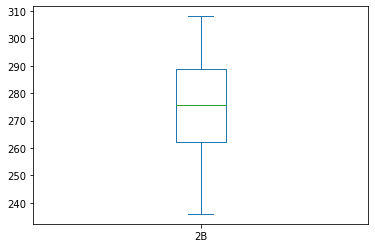

In [47]:
df['2B'].plot.box()

<AxesSubplot:>

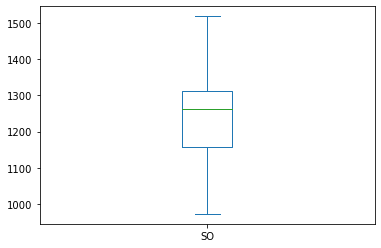

In [48]:
df['SO'].plot.box()

<AxesSubplot:>

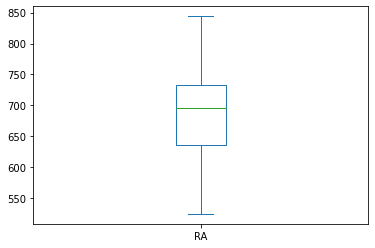

In [49]:
df['RA'].plot.box()

<AxesSubplot:>

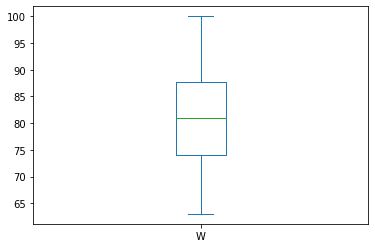

In [50]:
df['W'].plot.box()

<AxesSubplot:>

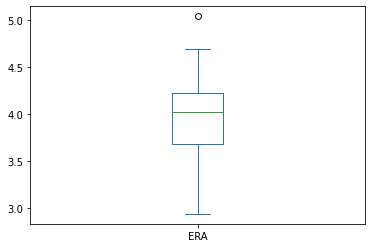

In [51]:
df['ERA'].plot.box()

<AxesSubplot:>

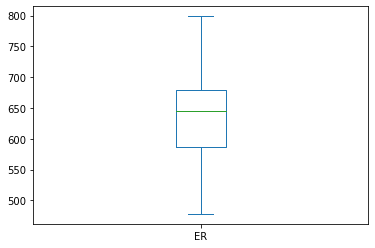

In [52]:
df['ER'].plot.box()

<AxesSubplot:>

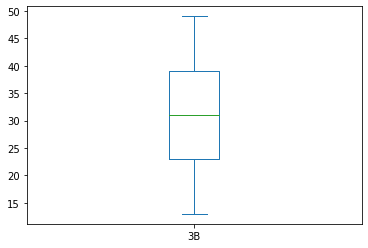

In [53]:
df['3B'].plot.box()

<AxesSubplot:>

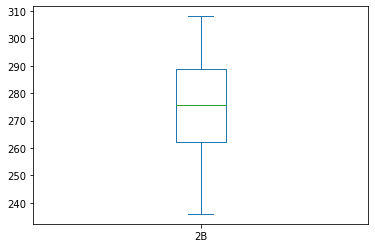

In [54]:
df['2B'].plot.box()

<AxesSubplot:>

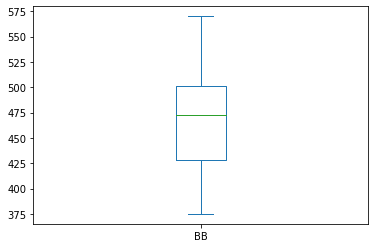

In [55]:
df['BB'].plot.box()

<AxesSubplot:>

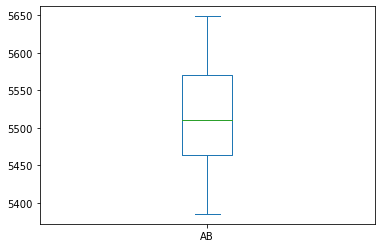

In [56]:
df['AB'].plot.box()

<AxesSubplot:>

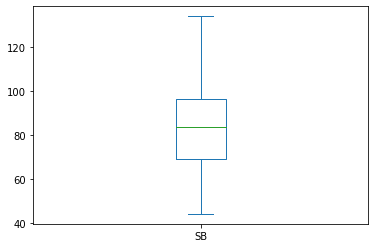

In [57]:
df['SB'].plot.box()

<AxesSubplot:>

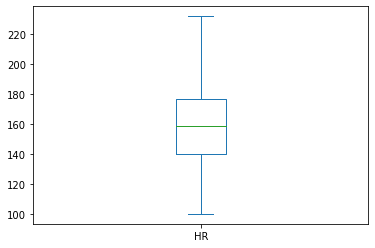

In [58]:
df['HR'].plot.box()

<AxesSubplot:>

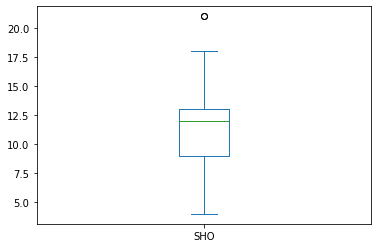

In [59]:
df['SHO'].plot.box()

<AxesSubplot:>

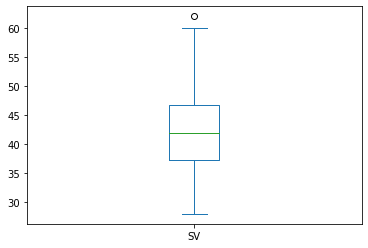

In [60]:
df['SV'].plot.box()

<AxesSubplot:>

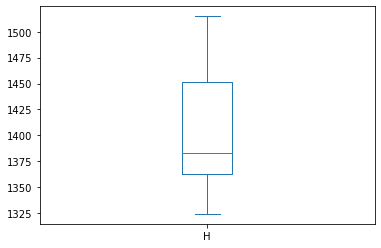

In [61]:
df['H'].plot.box()

<AxesSubplot:>

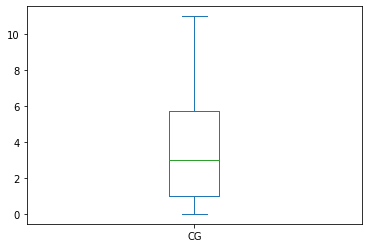

In [62]:
df['CG'].plot.box()

<AxesSubplot:>

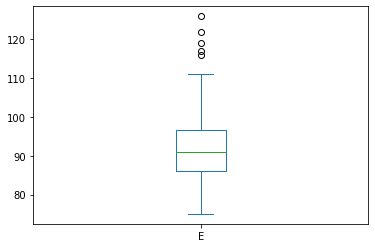

In [63]:
df['E'].plot.box()

<AxesSubplot:>

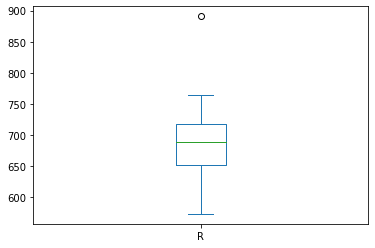

In [64]:
df['R'].plot.box()

# Considering the outlier removal

In [66]:
df.shape

(30, 17)

In [67]:
from scipy.stats import zscore

In [68]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [69]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [70]:
df_new_z.shape

(29, 17)

In [71]:
df.shape

(30, 17)

# Data Loss %

In [72]:
Data_loss=((30-29)/30)*100

In [74]:
print(Data_loss,'%')

3.3333333333333335 %


# Spliting the data into training and testing data

In [75]:
x=df.drop('W',axis=1)
y=df['W']

# Scalling the data usiging max scaler

In [76]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [77]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :-0.9609590618835544
At random state 0,the testing accuracy is :-0.6629341689506607


At random state 1,the training accuracy is :-0.9715846357165406
At random state 1,the testing accuracy is :-0.38417246900760227


At random state 2,the training accuracy is :-0.9898192153844537
At random state 2,the testing accuracy is :--2.0819989550107283


At random state 3,the training accuracy is :-0.9722553885185528
At random state 3,the testing accuracy is :-0.4618378970602285


At random state 4,the training accuracy is :-0.9647461497996579
At random state 4,the testing accuracy is :-0.46606852927285014


At random state 5,the training accuracy is :-0.9503092887369992
At random state 5,the testing accuracy is :-0.7517105066858644


At random state 6,the training accuracy is :-0.9489470045214466
At random state 6,the testing accuracy is :-0.8376419521868435


At random state 7,the training accuracy is :-0.9631978535911315
At random state 7,the testing 

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [79]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [80]:
pred_test=lr.predict(x_test)

In [81]:
print(r2_score(y_test,pred_test))

0.8804448045510308


# cross validation of the model

In [82]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean}and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    
    print("\n")

At cross fold2 the cv score is -1.0579322058345566and accuracy score for training is 0.9531948414942486 and accuracy for testing is 0.8804448045510308


At cross fold3 the cv score is 0.22588460167737182and accuracy score for training is 0.9531948414942486 and accuracy for testing is 0.8804448045510308


At cross fold4 the cv score is 0.24952166654370334and accuracy score for training is 0.9531948414942486 and accuracy for testing is 0.8804448045510308


At cross fold5 the cv score is 0.040755406674661356and accuracy score for training is 0.9531948414942486 and accuracy for testing is 0.8804448045510308


At cross fold6 the cv score is 0.2515353093720194and accuracy score for training is 0.9531948414942486 and accuracy for testing is 0.8804448045510308


At cross fold7 the cv score is 0.38908046442901506and accuracy score for training is 0.9531948414942486 and accuracy for testing is 0.8804448045510308


At cross fold8 the cv score is 0.31937022109669044and accuracy score for training 

Since the number of folds don't have such impact on the accuracy score and cv_Score, So cv=6 is selected

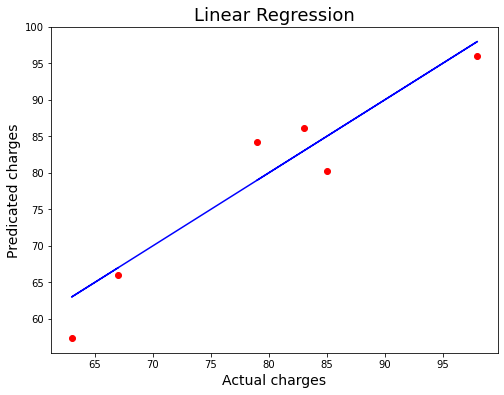

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicated charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Best fit line is covering most of the datapoints which shows good fit of our model

# Regularization

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
              'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [89]:
# final model training
las = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

93.83704019494246

In [90]:
pred_ls=ls.predict(x_test)

In [91]:
lss=r2_score(y_test,pred_test)

In [92]:
lss*100

88.04448045510308

In [93]:
cv_score=cross_val_score(ls,x,y,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

46.63321349130543

# Ensemble technique

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'mae', 'max_features': 'log2'}


In [114]:
rf=RandomForestRegressor(criterion='mae',max_features= 'log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score :',rfc*100)

R2 Score: 72.71701455813002
cross val score : -62.25155735766575


# Conclusion

In [115]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))

In [116]:
df_com

,original,predicted
0,67,66.065113
1,63,57.388128
2,98,95.986882
3,85,80.222547
4,83,86.153951
5,79,84.290295
